In [1]:
from loader import data_load
from Embeddings import embeddings
from mask import mask
from attentionblock import attention_block
import tensorflow as tf

In [2]:
length = 15
data = data_load('shakespeare.txt')
train, valid, tokenizer = data(15, 32, 0.9)

In [3]:
input_dim = len(tokenizer.get_vocabulary())-2
output_dim = 64

In [14]:
inputs = tf.keras.Input([None,], dtype = 'int32')

embedding = embeddings(input_dim, output_dim, length)(inputs)

masking = mask(embedding)()

attention_b1 = attention_block(32, 16,32, output_dim)(embedding, masking)
attention_b2 = attention_block(64, 32, 64, output_dim)(attention_b1, masking)
attention_b3 = attention_block(64, 32, 64, output_dim)(attention_b2, masking)

output = tf.keras.layers.Dense(len(tokenizer.get_vocabulary())-2, activation = 'softmax')(attention_b3)

model2 = tf.keras.Model(inputs, output)

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embeddings (embeddings)        (None, None, 64)     3456        ['input_1[0][0]']                
                                                                                                  
 tf.compat.v1.shape_1 (TFOpLamb  (3,)                0           ['embeddings[0][0]']             
 da)                                                                                              
                                                                                                  
 tf.__operators__.getitem_1 (Sl  ()                  0           ['tf.compat.v1.shape_1[0][0]'

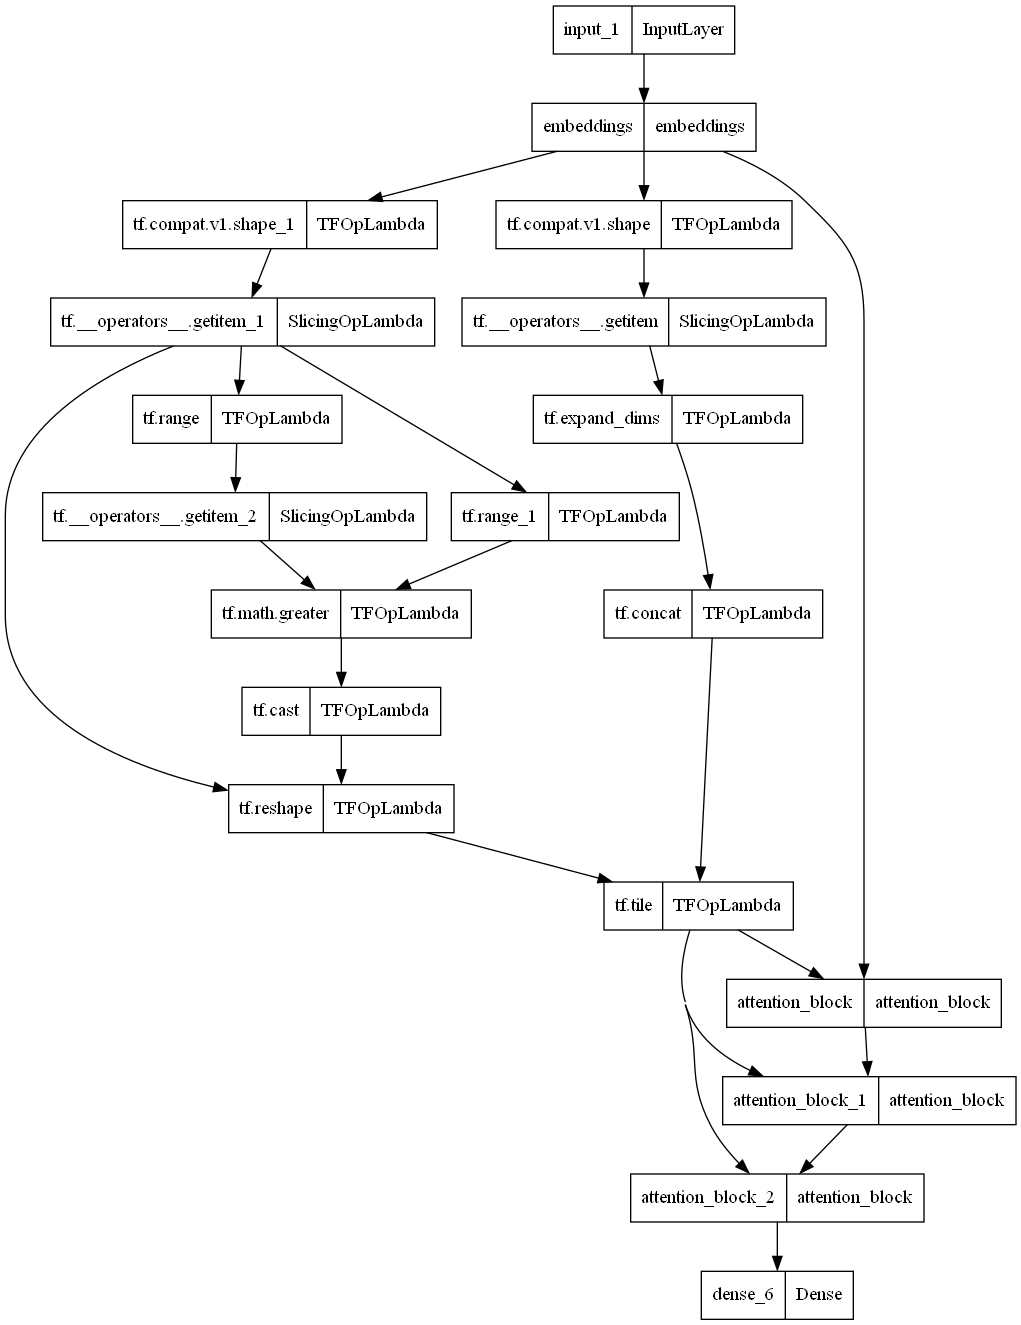

In [6]:
tf.keras.utils.plot_model(model)

In [7]:
callback_cpoint = tf.keras.callbacks.ModelCheckpoint(filepath ='generator3.keras', save_best_only = True, verbose = 1)
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer= tf.keras.optimizers.Nadam())

In [8]:
model.fit(train, validation_data = valid, epochs = 6, callbacks= [callback_cpoint], verbose =1)

Epoch 1/6
  31370/Unknown - 1682s 53ms/step - loss: 0.7905 - accuracy: 0.7574
Epoch 1: val_loss improved from inf to 0.51785, saving model to generator3.keras
31370/31370 [==============================] - 1747s 55ms/step - loss: 0.7905 - accuracy: 0.7574 - val_loss: 0.5179 - val_accuracy: 0.8392
Epoch 2/6
31370/31370 [==============================] - ETA: 0s - loss: 0.4503 - accuracy: 0.8585
Epoch 2: val_loss improved from 0.51785 to 0.47160, saving model to generator3.keras
31370/31370 [==============================] - 1557s 50ms/step - loss: 0.4503 - accuracy: 0.8585 - val_loss: 0.4716 - val_accuracy: 0.8525
Epoch 3/6
31370/31370 [==============================] - ETA: 0s - loss: 0.5452 - accuracy: 0.8309
Epoch 3: val_loss did not improve from 0.47160
31370/31370 [==============================] - 1498s 48ms/step - loss: 0.5452 - accuracy: 0.8309 - val_loss: 0.9140 - val_accuracy: 0.7167
Epoch 4/6
31369/31370 [============================>.] - ETA: 0s - loss: 1.0576 - accuracy: 0.

In [18]:
model2.load_weights('generator.keras')
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Nadam(), metrics= ['accuracy'] )

In [33]:
model = tf.keras.Sequential([tokenizer,
                            tf.keras.layers.Lambda(lambda x:x-2),
                            model2])

In [62]:
def next_character(text, temperature = 1):
    prediction = model.predict([text], verbose = 0)[0,-1:]
    rescaled_logits = tf.math.log(prediction)/temperature
    char_id = tf.random.categorical(rescaled_logits, num_samples = 1)[0,0]
    return tokenizer.get_vocabulary()[char_id+2]
def extend_text(text, n_char=50,temperature = 1 ):
    for _ in range(n_char):
        text+= next_character(text, temperature)
    return text
    
    

In [75]:
print(extend_text('to be or not to b', 50, 1))

to be or not to bre as shele ly. d? wilidi, fe-dire,
d darifim th t
